# Feature Selection with Python

A dataset consists of features. A feature refers to a single characteristic or dimension of data.

Features are also known as attributes. For instance, a dataset of car has features like car models,
car color, seating capacity, mileage etc.

Selecting the right set of features not only improves the performance of the Machine Learning model but also
speed up the training time of the algorithm.

# Feature Selection Based on Variance

Features having constant or very similar values do not play any significant role in Machine Learning tasks
such as Classification and Regression.

Therefore, features that are very similar should be removed from the dataset.

One of the way is to find the variance for a particular feature and remove features having variance less than a
certain threhold.

A feature with low variance has a high degree of similarity among its data points and vice-versa

In [1]:
import pandas as pd
import numpy as np

In [2]:
wine_data= pd.read_csv("winequality-red.csv")

wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# dividing data into features and labels

features= wine_data.drop(["quality"],axis=1)
labels= wine_data.filter(["quality"],axis=1)

Feature Selection based on variance does not depend upon the output label.

Variance shows how far a set of data is spread out.

In [4]:
# printing variance

features.var()

fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
dtype: float64

In [5]:
# filtering features based on threshold

from sklearn.feature_selection import VarianceThreshold

var_sel= VarianceThreshold(threshold=(0.1))

var_sel.fit(features)

VarianceThreshold(threshold=0.1)

In [6]:
attributes_to_retain= features.columns[var_sel.get_support()]
attributes_to_retain

Index(['fixed acidity', 'residual sugar', 'free sulfur dioxide',
       'total sulfur dioxide', 'alcohol'],
      dtype='object')

You can also get the attribute names that are not selected 

In [8]:
attributes_to_filter= [attr for attr in features.columns
                     if attr not in features.columns[var_sel.get_support()]]
attributes_to_filter

['volatile acidity', 'citric acid', 'chlorides', 'density', 'pH', 'sulphates']

In [9]:
filtered_dataset= features.drop(attributes_to_filter, axis=1)

filtered_dataset.head()

,fixed acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,alcohol
0,7.4,1.9,11.0,34.0,9.4
1,7.8,2.6,25.0,67.0,9.8
2,7.8,2.3,15.0,54.0,9.8
3,11.2,1.9,17.0,60.0,9.8
4,7.4,1.9,11.0,34.0,9.4


One of the main issues with variance based feature selection is that it doesn't take the relationship between
mutual features into account while feature selection.

To avoid selecting redundant features, you can use the feature selection method based on correlation.

# Feature Selection based on Correlation

In feature selection based on correlation, the features are selected using the following steps:
    
1. Mutual correlation between all the features is calculated.

2. The correlation threshold is set.

3. The features having mutual correlation greater than the correlation threshold with any other feature are
removed from the dataset.

In [10]:
# printing correlation

correlation_matrix= features.corr()
correlation_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


<AxesSubplot:>

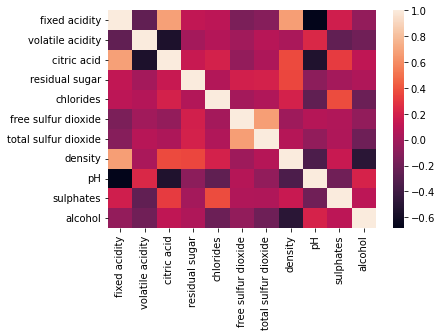

In [11]:
# displayinh seaborn heatmap for correlation

import seaborn as sns
sns.heatmap(correlation_matrix)

To find all the correlated features, you can iterate through the rows in the feature correlation matrix and
then select the features that have a correlation higher than a certain threshold.

In [12]:
# creating a correlation matrix for features

correlated_features_matrix=set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j])>0.6:
            corr_col= correlation_matrix.columns[i]
            correlated_features_matrix.add(corr_col)

In [13]:
len(correlated_features_matrix)

4

In [14]:
print(correlated_features_matrix)

{'pH', 'density', 'citric acid', 'total sulfur dioxide'}


Finally, you can create the final feature set by removing the correlated features

In [15]:
filtered_dataset= features.drop(correlated_features_matrix, axis=1)

filtered_dataset.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,sulphates,alcohol
0,7.4,0.70,1.9,0.076,11.0,0.56,9.4
1,7.8,0.88,2.6,0.098,25.0,0.68,9.8
2,7.8,0.76,2.3,0.092,15.0,0.65,9.8
3,11.2,0.28,1.9,0.075,17.0,0.58,9.8
4,7.4,0.70,1.9,0.076,11.0,0.56,9.4


# Solving Regression Problems in Machine Learning

Machine Learning is a branch of Artificial Intelligence that enables computer programs to automatically learn
and improve from experience.

Machine Learning algorithms can be broadly categorized into two types: Supervised Learning and Unsupervised Learning.

Supervised Machine Learning lgorithms are those algorithms where the input dataset and the corresponding output ot tru prediction
is available and the algorithm try to find the relationship between inputs and outputs

In Unsupervised Machine Learning algorithms, the true labels for the oputputs are not known.
Rather, the algortihm try to find similar patterns in the data. Clustering algorithm are a typcal example of unsupervised learning.

Supervised learning algorithms are further dividedinto two types:
    
1. Regression Algorithms

2. Classification Algorithms

Regression algorithms predict a continuous value for example, the price of a house, sales of a Brand.

Classification algorithms predict a discrete value, such as whether a customer will leave the bank or not, 
whether a student is going to pass or fail in exam etc.

# Preparing Data for Regression Problems

Machine Learning algorithms require data to be in a certain format before the algorithms can be trained on the data.

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [35]:
# importing the tips dataset
tips_df= sns.load_dataset("tips")

#printing dataset header
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


We will be using Machine Learning algorithm to predict the tip for a particular record based on the remaining features
such as total_bill, day, time etc

Dividing Data into Features and Labels

As a first step, we divide the data into features and labels set.

Our labels set consists of values from the tip column, while the feature set consists of values from the 
remaining columns.

In [36]:
# extracting features
X=tips_df.drop(['tip'],axis=1)

# extracting labels
y=tips_df['tip']

In [37]:
X.head()

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
3,23.68,Male,No,Sun,Dinner,2
4,24.59,Female,No,Sun,Dinner,4


In [38]:
y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

Converting Categorical Data to Numbers

Machine Learning algorithms can only work with numbers. Therefore, it is important to convert catagorical data
into a numeric format.

In this regard, the first step is to create a dataset of all numerica values. To do so, drop the categorical columns
from the dataset.

In [39]:
# removing categorical features

numerical= X.drop(['sex','smoker','day','time'],axis=1)

numerical.head()

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4


Next, you need to create a dataframe that contains only categorical columns.

One of the most common approaches to convert a categorical column to a numeric one is via One-Hot encoding.

In One-Hot encoding, for every unique value in the original columns, a new column is created.

In [40]:
categorical= X.filter(['sex','smoker','day','time'])

categorical.head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


In [41]:
import pandas as pd

cat_numerical= pd.get_dummies(categorical)
cat_numerical.head()

,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,0,1,0,1,0,0,0,1,0,1
1,1,0,0,1,0,0,0,1,0,1
2,1,0,0,1,0,0,0,1,0,1
3,1,0,0,1,0,0,0,1,0,1
4,0,1,0,1,0,0,0,1,0,1


The final step is to join the numerical columns with the one-hot encoded columns.

In [42]:
# concatenating nueric and one-hot encoded features

X=pd.concat([numerical, cat_numerical],axis=1)
X.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,2,0,1,0,1,0,0,0,1,0,1
1,10.34,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3,1,0,0,1,0,0,0,1,0,1
3,23.68,2,1,0,0,1,0,0,0,1,0,1
4,24.59,4,0,1,0,1,0,0,0,1,0,1


Dividing Data into Training and Test Sets

After a Machine Learning algorithm has been trained, it needs to be evaluated to see how well it performs on unseen data.

Therefore, we divide the dataset into two sets i.e. train set and test set.

The dataset or model is trained on train set and evaluated on the test set.

To split the data into training and test sets, you can use the train_test_split() function.

In [43]:
# dividing data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.20,random_state=0)

Data Scaling/Normalization

The final step before data is passed to Machine Learning algorithms is to scale the data.

You can see that some columns of the dataset contain small values, while the others contain very large values.

It is better to convert all values to a uniform scaler. To do so, you can use StandardScaler() function.

In [44]:
# fature scaling using Standard Scaler

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

We have converted data into a format that can be used to train Machine Learning algortihms for regression

Regression model is used to predict the continuous value.

Linear Regression is linear model that assumes a linear relationship between inputs and outputs and it
minimizes the cost of error between the predicted and actual output using functions like Mean Absolute Error

Why use Linear Regression Algorithm?

Linear Regression algorithm is useful because:
    
1. Linear regression is a simple to implement and easilty interpretable algorithm.

2. Takes less training time to train, even for huge datasets.

3. Linear regression coefficients are easy to interpret.

Disadvantages of Linear Regression Algorithm

1. Performance of model is easilty affected by outlier presence.

2. Assumes a linear relationship between dependen and independent variables, which can result in an increased error.

Implementing Linear Regression with Sklearn

To implement linear regression with Sklearn, you can use the Linear Regression class from the sklearn.linear_model

In [45]:
# importing linear regression model from sklearn
from sklearn.linear_model import LinearRegression

lin_reg= LinearRegression()

# training the model
regressor= lin_reg.fit(X_train, y_train)

#making predictions on the test set
y_pred= regressor.predict(X_test)

Once you have trained a model and have made predictions on the test set, the next step is to know hoe
well your model has performed for making predictions on the inknown test set.

There are various metrics to check that.

1. Mean Absolute Error

2. Mean Squared Error

3. Root Mean Squared Error

Mean Absolute Error- Mean Absolute Error (MAE) is calculated by taking the average of absolute error obtained by
subtracting real values from predicted values.


Mean Squared Error- MSE is similar to MAE. However, the error for each record is squared in the case of MSE in order
to punish data records with a huge difference between predicted and actual values.

Root Mean Squared Error- RMSE is simply the under the root of mean squared error.

In [46]:
from sklearn import metrics

In [47]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 0.7080218832979828
Mean Squared Error: 0.8939195221609607
Root Mean Squared Error: 0.945473173686573


By, looking at the mean absolute error, it can be concluded that, on avergae there is an average of 0.70 for predictions.

This means that on average, the predicted tip values are 0.70$ more or less than the actual tip values.

# Random Forest Regression

Random Forest is a tree-based algorithm that converts features in to tree nodes and then uses entropy loss to
make predictions.

Random Forest us useful when

1. You have lots of missing data or an imbalanced dataset.

2. With a large number of trees, you can avoid overfitting while training.

3. The random forest algorithm can solve both classification and regression tasks

In [49]:
from sklearn.ensemble import RandomForestRegressor

rf_reg= RandomForestRegressor(random_state=42, n_estimators=500)

#training the model
regressor= rf_reg.fit(X_train, y_train)

# making predictions on the test set
y_pred= regressor.predict(X_test)

# evaluating the model performance
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 0.6977134693877551
Mean Squared Error: 0.7840190285387771
Root Mean Squared Error: 0.8854484900539258


# Classification Model

Classification problems are the type of problems where you have to predict a discrete value i.e. 

Whether the condition of car is good or not.

Like regression, you have to first convert data into a specific format before it can be used to train classification
algorithms.

In [50]:
import pandas as pd
import numpy as np

In [51]:
churn_df= pd.read_csv("Churn_Modelling.csv")
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The output shows that the dataset contains information such as surname, customer id, geopraphy, gender, age etc.

The exited columncontains information regarding whether or not the customer exited the bank after 6 months.

In [52]:
# removing unnecessary columns

churn_df= churn_df.drop(['RowNumber','CustomerId','Surname'],axis=1)

Dividing data into features and labels

In [53]:
X= churn_df.drop(['Exited'],axis=1)

y= churn_df['Exited']

In [54]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [55]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

Converting Categorical Data to Numbers

In [56]:
numerical= X.drop(['Geography','Gender'],axis=1)

numerical.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [57]:
categorical= X.filter(['Geography','Gender'])
categorical.head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [59]:
import pandas as pd

cat_numerical= pd.get_dummies(categorical)
cat_numerical.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,0,0,1,0
1,0,0,1,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,0,0,1,1,0


In [60]:
X=pd.concat([numerical, cat_numerical],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


Divide data into Training and test sets

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.20, random_state=0)

Data Scaling/Normalization

In [62]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

# Binary Classification Problems

Binary Classification Probelems are thos classification probelems where there are only two possible values for the output label.

For e.g. Whether a customer will churn or not.

# Logistic Regression

Logistic Regression is a linear model, which makes classification by passing the output of linear regression
through a sigmoid function.

In [63]:
from sklearn.linear_model import LogisticRegression

log_clf= LogisticRegression()

classifier= log_clf.fit(X_train, y_train)

y_pred= classifier.predict(X_test)

Once you have trained a model and have made predictions on the test set, the next steps is to know how well your model has
performed for making predictions on the unknown test set.

There are various metrics to evaluate a classification model.

Some of the most common used classification metrics are F1, recall, precision, accuracy and confusion matrix.

True Negatives (TN): True Negatves are those output labels that are actually false and the model also
predicted them as False.

True Positive (TP): True Positives are those labels that are actually true and also predicted as true by the model.

False Negative (FN): False Negatives are labels that are actually true but predicted as False by Machine Learning Models

False Positive (FP): Labels that are actually false but predicted as true by the model are called false positive

Confusion Matrix

Precision- Precision is obtained by dividing  True positives by the sum of true positives and false positives

Precision= tp/(tp+fp)

Recall- Recall is calculated by dividing true positives by the sum of true positive and false negative

Recall= tp/(tp+fn)

F1- Measure- It is the harmonic mean of precision and recall

Accuracy- Accuracy refers to the number  of correctly predicted labels divided by the total number of observations in
a dataset.

Which metric to choose?

In the case of balanced dataset .i.e. where the number of labels for each class is balanced accuracy can be used as an evaluation metric.

For imbalanced datasets, you can use F1 measure or Precision and Recall as the evaluation metric.

In [65]:
# evaluating the algorithmon the test set

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [67]:
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

[[1526   69]
 [ 309   96]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.58      0.24      0.34       405

    accuracy                           0.81      2000
   macro avg       0.71      0.60      0.61      2000
weighted avg       0.78      0.81      0.78      2000

0.811


In [69]:
from sklearn.ensemble import RandomForestClassifier

rf_clf= RandomForestClassifier(random_state=42, n_estimators=500)

# training the random forest classifier
classifier= rf_clf.fit(X_train, y_train)

y_pred= classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[1530   65]
 [ 198  207]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1595
           1       0.76      0.51      0.61       405

    accuracy                           0.87      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000

0.8685
